In [2]:
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torch
from ultralytics import YOLO
import glob
import matplotlib.pyplot as plt
import csv

In [3]:
X_train = np.load("./data_given/X_train.npy")
X_test = np.load("./data_given/X_test.npy")
y_train = np.load("./data_given/y_train.npy")

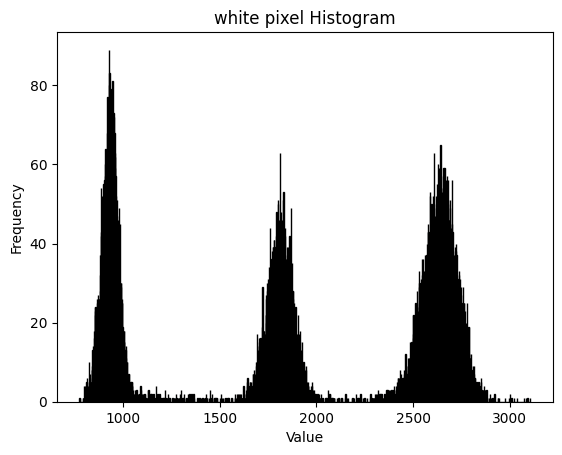

In [4]:
white_pixel_value = []
num_img = X_test.shape[0]
for idx_img in range(num_img):
    img = X_test[idx_img:idx_img+1, :].reshape(20, 20)
    img = cv2.resize(img, (80, 80))
    img = (img).astype(np.uint8)  # 0-1 の浮動小数点数を 0-255 の整数に変換
    img = cv2.GaussianBlur(img,(9,9),0)
    #img = cv2.medianBlur(img,5)
    ret, th = cv2.threshold(img, 0, 255, cv2.THRESH_OTSU)
    #kernel = np.ones((3,3),np.uint8)
    #th = cv2.erode(th,kernel,iterations = 1)
    #th = cv2.morphologyEx(th, cv2.MORPH_OPEN, kernel, iterations=3)
    num_255s = np.count_nonzero(th == 255) # 白
    white_pixel_value.append(num_255s)
    #if 1100 < num_255s and num_255s < 1200: #1100~~1300
    #    print(idx_img)
    #    plt.imshow(th, cmap="gray")
    #    plt.colorbar()
    #    plt.show()
        #break
        

plt.hist(white_pixel_value, bins=range(min(white_pixel_value), max(white_pixel_value) + 2), edgecolor='black')
plt.title('white pixel Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


In [5]:
def count_num_white_pixels(img):
    img_r = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    img_r_uint8 = (img_r).astype(np.uint8)  # 0-1 の浮動小数点数を 0-255 の整数に変換
    img_r_uint8 = cv2.GaussianBlur(img_r_uint8,(9,9),0)
    ret, th = cv2.threshold(img_r_uint8, 0, 255, cv2.THRESH_OTSU)
    num_255s = np.count_nonzero(th == 255) # 白
    return num_255s

932


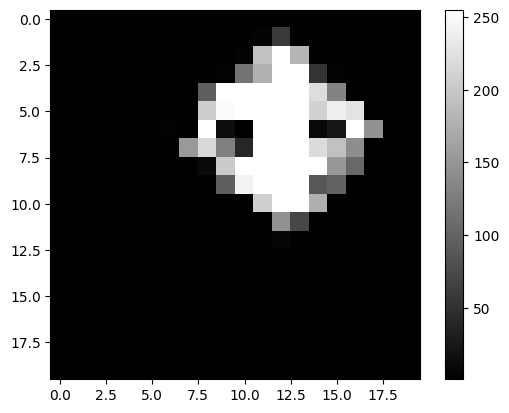

In [7]:
i = 1
X_train_1 = X_train[i:i+1, :].reshape(20, 20)
img = np.stack((X_train_1.copy(),)*3, axis=-1)
pil_img = Image.fromarray(img.astype('uint8'), 'RGB')
resized_img = pil_img.resize((80, 80))
num_white_pixels = count_num_white_pixels(np.array(resized_img))
print(num_white_pixels)


img = np.stack((X_train_1.copy(),)*3, axis=-1)
pil_img = Image.fromarray(img.astype('uint8'), 'RGB')
resized_img = pil_img.resize((80, 80))
rimg = np.array(resized_img)
plt.imshow(img, cmap="gray")
plt.colorbar()
plt.show()